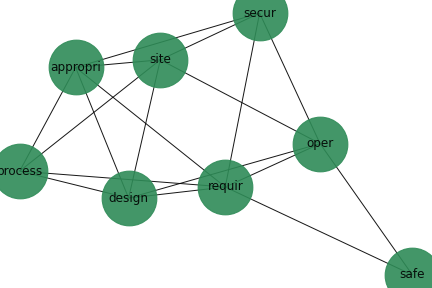

# Step 7: Build knowledge-graph-from-keywords

|**[Overview](#Overview)** |**[Prior-steps](#Prior-steps)**|**[How-to-use](#How-to-use)**|**[Next-steps](#Next-steps)**|**[Postscript](#Postscript)**|**[Acknowledgements](#Acknowledgments)|

# Overview
This accesses the relationships between selected keywords, and show it as a knowledge graph. 
This will allow subsequent steps to craft an appropriate portfolio services framework within the particular business domain being analysed.
These linkages suggest ways of laying out the knowledge area under question.

# Prior-steps
Step 5 and 6

# How-to-use
Work from this description or the equivalent Jupyter [notebook](https://github.com/lawrencerowland/Data-Model-for-Project-Frameworks/blob/master/Project-frameworks-by-using-NLP-with-Python-libraries/Jupyter%20notebooks/Step-7-knowledge-graph-from-keywords.ipynb). Any code omitted for clarity is available in the notebook.

## Import modules

In [1]:
#hide
import gensim
from gensim.summarization.keywords import get_graph
import networkx as nx
import matplotlib.pyplot as plt #note a different module imported from matplotlib
# Note that Smart_open.gcs may not import successfully depending on Gensim set up. This doesnt matter. 

unable to import 'smart_open.gcs', disabling that module


## Open the interim results folder

In [2]:
#hide
import os
directory= "/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Interim-results/"
# Change directory location for your particular set-up.

with open(os.path.join(directory,'Corpus_as_one_string.txt')) as f:
    Corpus_as_one_string=f.read()
    f.close()

## Generate a full graph of links between all words in all documents

Gensim does this with an application of the TextRank algorithm, which is an extension of PageRank. The get_graph API contains all (stemmed) words, from which these keywords have been drawnSome of the results have already been seen, as Keywords  extractions from these main results. 

In [3]:
h=get_graph(Corpus_as_one_string)

The first time it is worth exploring this graph object to understand it:some examples are given in the notebook. 
The nuclear example generates a graph with 2930 nodes, each a stemmed word. 

In [ ]:
#hide
# Explore this graph object
h.edges()[20:30]
h.nodes()[0:5]
len(h.nodes())
sorted(h.nodes())[0:5]
h.neighbors("consult")
h.edge_weight(('pdf', 'principl'))

## Locate our keywords in the graph object
We are interested just in the relationships inbetween the keywords we have already identified. 

In Step 6 we identified the specific keywords we were interested in. We have already dropped synonyms.

Now we also ignore 'ONR' and 'include' as unhelpful. 

This leaves us with **safety, design, requires, operate, appropriate, process, secure and site**

Because the words are stemmed in this graph object, the 'neighbors' API is needed to find the stem-word for all of the keywords.

In [ ]:
h.neighbors("includ") # run this a few times until you find the 'stem' being used for each keyword you want

After manually entering in different stems, I find the following match the keywords I want.

'safe', 'design' 'requir','oper','appropri','process','secur','site', 'onr','includ'.



## Generate a NetworkX graph

The Gensim graph object is not very easy to handle. We transfer it to a NetworkX graph. 

In [4]:
g = nx.Graph()
g=g.to_undirected() #my addition
for edge in h.edges():
    
    g.add_node(edge[0])
    g.add_node(edge[1])
    g.add_weighted_edges_from([(edge[0], edge[1], h.edge_weight(edge))])

    h.edge_weight(edge) #doesn't seem to be needed

## Reduce the graph to just those links between keywords
The above graph can be plotted, but its pretty dense. 
i.e. Manually list the stems you want to keep. 
The line below removes all nodes except for the keyword-stems.

In [5]:
g.remove_nodes_from([n for n in g if n not in set(['safe', 'design', 'requir','oper','appropri','process','secur','site'])])

In [7]:
g.nodes()

NodeView(('requir', 'design', 'site', 'secur', 'appropri', 'oper', 'process', 'safe'))

## Plot graph between keywords

In [12]:
pos = nx.spring_layout(g)
figure1=plt.figure()
nx.draw(g, pos, edge_color='black', width=1, linewidths=1,node_size=3000, node_color='seagreen', alpha=0.9,labels={node: node for node in g.nodes()})
plt.axis('off')
plt.savefig(directory+'Knowledge-graph-from-keywords-1.png') #saves last figure generated

<Figure size 432x288 with 0 Axes>

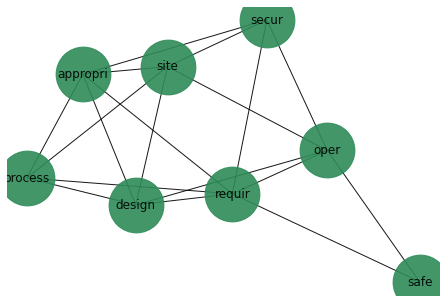

In [13]:
plt.show()

In [13]:
nx.write_graphml(g, directory+'Keyword-graph.graphml', encoding='utf-8', prettyprint=True, infer_numeric_types=False)

In [26]:
#hide

#prettyprint (bool (optional)) – If True use line breaks and indenting in output XML.
#infer_numeric_types (boolean) – Determine if numeric types should be generalized.
#For example, if edges have both int and float ‘weight’ attributes, we infer in GraphML that both are floats.

#use this if problems between module names -->    if __name__=="__main__":

# Next-steps
Step 8 uses this keyword model to outline the business domain relating to the whole library collected. 

# Postscript: Alternative
Instead of removing nodes, a subgraph can be generated, but it does not allow one to throw away the full graph. 

In [20]:
Graph_only_top_nodes=all_node_nx_graph.subgraph(['safe', 'onr', 'requir','includ','design','site','secur','process','appropri','oper'])

# Acknowledgements
This article showed how to move from Gensim to Networkx [here](https://dev.to/b_dmarius/python-keywords-extraction-machine-learning-project-series-part-2-2bii)